<a href="https://colab.research.google.com/github/ytingwen2658/hwww1/blob/master/Foxconn_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

%matplotlib inline

In [14]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "2317",
    "start_date": "2022-01-13",
    
}
r = requests.get(url, params=parameter)
data = r.json()
stock_deal_info = data["data"]
print(pd.DataFrame(stock_deal_info))
data=pd.DataFrame(stock_deal_info)

           date stock_id  Trading_Volume  Trading_money   open    max    min  \
0    2022-01-13     2317        19714232     2073574056  105.0  105.5  104.5   
1    2022-01-14     2317        39061978     4050449624  105.0  105.5  103.0   
2    2022-01-17     2317        16235777     1683743255  103.5  104.5  103.5   
3    2022-01-18     2317        14894743     1548782389  104.5  104.5  103.5   
4    2022-01-19     2317        24064174     2496807090  103.5  104.5  103.0   
..          ...      ...             ...            ...    ...    ...    ...   
221  2022-12-08     2317        31027361     3161754629  102.0  102.5  101.5   
222  2022-12-09     2317        33294761     3406859417  102.5  103.0  102.0   
223  2022-12-12     2317        19498779     1982855426  102.0  102.0  101.0   
224  2022-12-13     2317        34807666     3530853812  102.0  102.5  101.0   
225  2022-12-14     2317        24772267     2530062580  101.5  102.5  101.0   

     close  spread  Trading_turnover  


In [15]:
data.head()

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,2022-01-13,2317,19714232,2073574056,105.0,105.5,104.5,105.5,1.0,10057
1,2022-01-14,2317,39061978,4050449624,105.0,105.5,103.0,103.5,-2.0,25878
2,2022-01-17,2317,16235777,1683743255,103.5,104.5,103.5,103.5,0.0,8944
3,2022-01-18,2317,14894743,1548782389,104.5,104.5,103.5,103.5,0.0,9070
4,2022-01-19,2317,24064174,2496807090,103.5,104.5,103.0,103.5,0.0,12635


<ipython-input-16-abd469109457>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


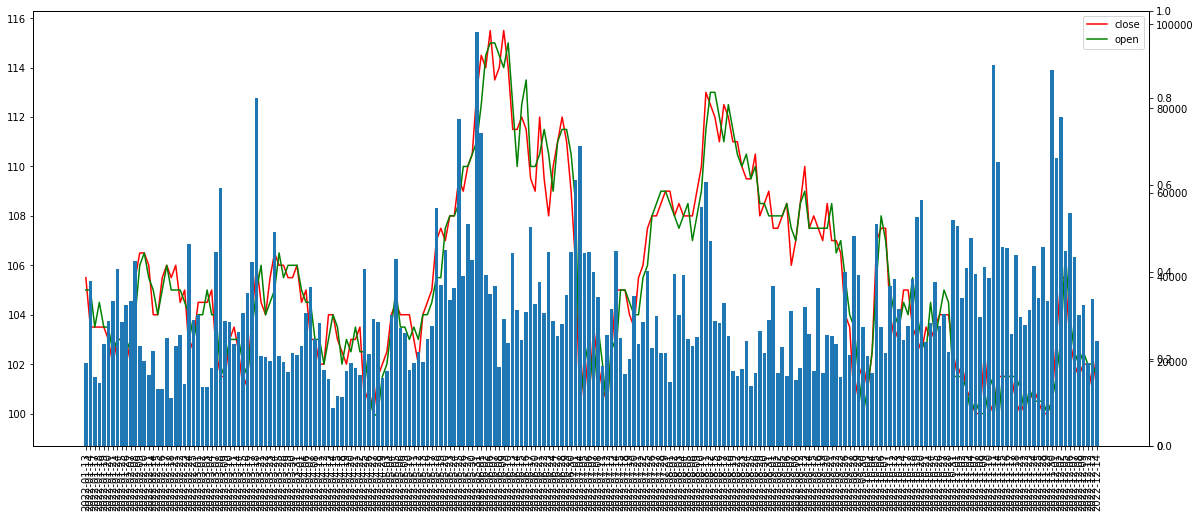

In [16]:
fig=plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)  
ax1 = fig.add_subplot(111)
ax1.plot(data.close,color='red',label='close')
ax1.plot(data.open,color='green',label='open')
plt.legend()
# twin 為共享x軸
ax2= ax1.twinx()
plt.bar(data.date,data.Trading_Volume.astype('int')//1000)
ax3 = ax1.twinx()
plt.savefig('2317_year.png')

In [18]:
#切分Test集
test = data[data.date>'2022-09-01']
train = data[:len(data)-len(test)]
#只要open high
train_set = train['open']
test_set = test['open']

In [19]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set= train_set.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)


In [20]:
X_train = [] 
y_train = []
for i in range(10,len(train_set)):
    X_train.append(training_set_scaled[i-10:i-1, 0]) 
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train, 
                         (X_train.shape[0], X_train.shape[1], 1))


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,BatchNormalization


In [22]:

keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1], 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [24]:
regressor.summary()
#我們只使用一層LSTM層，訓練100個epoch，batch_size設為16，並劃出train loss

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
9/9 [==============================] - 3s 9ms/step - loss: 0.1550
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0394
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0343
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0316
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0284
Epoch 6/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0282
Epoch 7/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0271
Epoch 8/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0265
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.0264
Epoch 10/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0264
Epoch 11/100
9/9 [==============================] - 0s 18ms/step - loss: 0.0251
Epoch 12/100
9/9 [==============================] - 0s 15ms/step - loss: 0.0249
Epoch 13/100
9/9 [==============================] - 0s

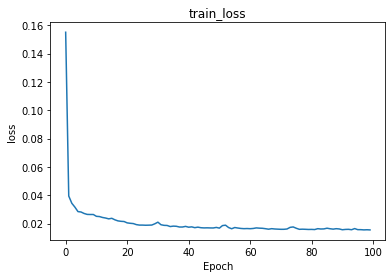

In [25]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])


In [26]:

dataset_total = pd.concat((train['open'], test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


3/3 [==============================] - 0s 7ms/step


In [33]:
predicted_stock_price[-1]

array([102.80222], dtype=float32)

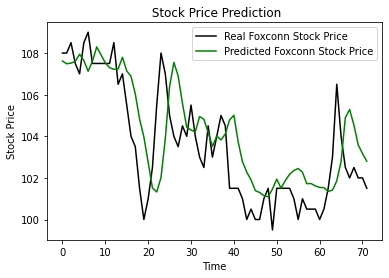

[102.80222]


In [35]:
plt.plot(test['open'].values, color = 'black', label = 'Real Foxconn Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Foxconn Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
print(predicted_stock_price[-1])

# plt.savefig('lstm_2330.png')

In [28]:
#在我們的網路層再加一層後(中間用dropout,防止過擬合)，再來看一次結果

keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100,return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100,activation='relu'))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [29]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 9, 100)            40800     
                                                                 
 dropout (Dropout)           (None, 9, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


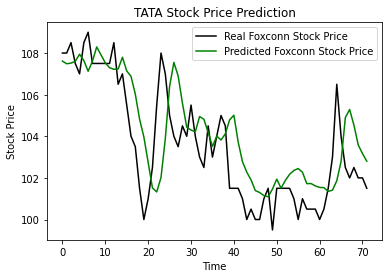

In [30]:
plt.plot(test['open'].values, color = 'black', label = 'Real Foxconn Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Foxconn Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')